<a href="https://colab.research.google.com/github/Leticia-Gobbi88/AI-Evoolve/blob/main/AnaliseSentimento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install langdetect


In [15]:
import zipfile

# Caminho para o arquivo zip
zip_path = "/content/analiseSentimento.zip"

# Extraindo o conteúdo do arquivo zip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/")


In [16]:
import os

# Listando os arquivos extraídos
extracted_files = os.listdir("/content/")
print(extracted_files)


['.config', 'TestDatasets', 'TweetsNeutralNews.csv', 'trainingdatasets', 'TweetsWithTheme.csv', 'NoThemeTweets.csv', 'testdatasets', 'TrainingDatasets', 'TweetsNeutralHash.csv', 'analiseSentimento.zip', 'sample_data']


In [17]:
import pandas as pd

# Caminho para o arquivo CSV
file_path = "/content/TweetsNeutralNews.csv"

# Carregando o arquivo no pandas
tweets_df = pd.read_csv(file_path)

# Visualizando as primeiras linhas
print(tweets_df.head())


                    id                                         tweet_text  \
0  1038992008461930496  Esquerda e direita empatam na Suécia; ultranac...   
1  1038873557902782465  Ao vivo: Estadão e TV Gazeta realizam terceiro...   
2  1038869931398516736  FOTOS: Apoiadores de Jair Bolsonaro realizam a...   
3  1038867128886198273  Barroso ameaça barrar propaganda se PT insisti...   
4  1038859914339409920  Serena Williams é multada pelo comportamento d...   

                       tweet_date sentiment query_used  
0  Mon Sep 10 03:26:13 +0000 2018    Neutro       veja  
1  Sun Sep 09 19:35:32 +0000 2018    Neutro       veja  
2  Sun Sep 09 19:21:07 +0000 2018    Neutro       veja  
3  Sun Sep 09 19:09:59 +0000 2018    Neutro       veja  
4  Sun Sep 09 18:41:19 +0000 2018    Neutro       veja  


In [18]:
# Particionando os dados em 10%
amostra_df = tweets_df.sample(frac=0.1, random_state=42)

# Visualizando a amostra
print(amostra_df.head())


                        id                                         tweet_text  \
25753  1043915398524080128  Risco com PT seria maior do que com Bolsonaro,...   
14786  1028302510296059904  Fracasso das políticas capitalistas torna o so...   
36667  1049751355332550656  Grupo de advogados organiza frente contra Bols...   
608    1034180101850714117         Lisboa Gastronomia https://t.co/ahcgVaM3GM   
34424  1051288850553864192         Madalena Gastrobar https://t.co/fDobjo1KoP   

                           tweet_date sentiment query_used  
25753  Sun Sep 23 17:30:00 +0000 2018    Neutro      folha  
14786  Sat Aug 11 15:29:58 +0000 2018    Neutro    estadao  
36667  Tue Oct 09 20:00:01 +0000 2018    Neutro      folha  
608    Mon Aug 27 20:45:25 +0000 2018    Neutro       veja  
34424  Sun Oct 14 01:49:28 +0000 2018    Neutro       veja  


In [19]:
from langdetect import detect

# Função para detectar o idioma de um texto
def detect_language(text):
    try:
        return detect(text)
    except:
        return "erro"

# Aplicando a função para detectar a linguagem
amostra_df['detected_language'] = amostra_df['tweet_text'].apply(detect_language)

# Visualizando as primeiras linhas da amostra com a detecção de linguagem
print(amostra_df[['tweet_text', 'detected_language']].head())


                                              tweet_text detected_language
25753  Risco com PT seria maior do que com Bolsonaro,...                pt
14786  Fracasso das políticas capitalistas torna o so...                pt
36667  Grupo de advogados organiza frente contra Bols...                pt
608           Lisboa Gastronomia https://t.co/ahcgVaM3GM                pt
34424         Madalena Gastrobar https://t.co/fDobjo1KoP                es


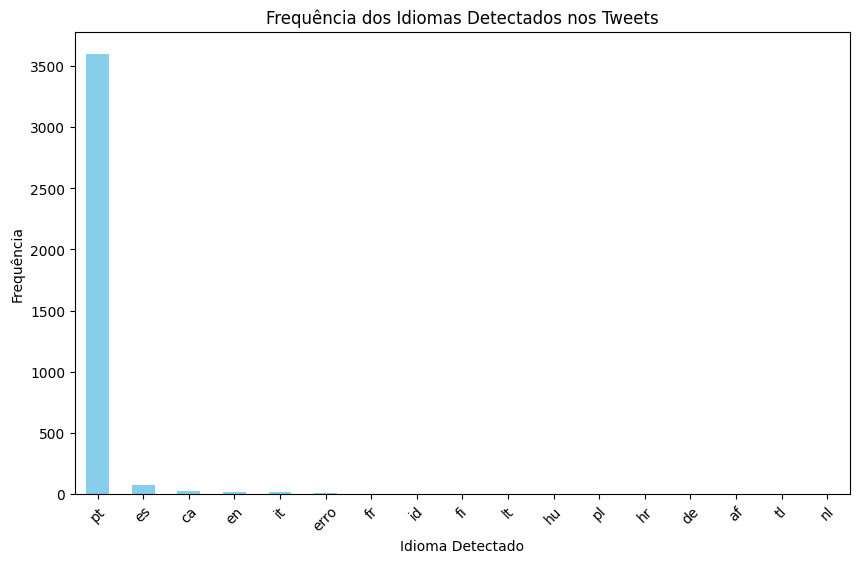

In [20]:
import matplotlib.pyplot as plt

# Contando a frequência de cada idioma
language_counts = amostra_df['detected_language'].value_counts()

# Plotando um gráfico de barras
plt.figure(figsize=(10, 6))
language_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Idioma Detectado')
plt.ylabel('Frequência')
plt.title('Frequência dos Idiomas Detectados nos Tweets')
plt.xticks(rotation=45)
plt.show()
